# Démonstration 1 - IFT 3700
### Sujets abordés :
- Fonctionnement des démonstrations
- Présentation du format "Jupyter Notebook"
- Biais cognitifs :
  1. Problème de comparaisons multiples
    - Révision des valeurs p
    - Correction de Bonferroni
  2. Régression vers la moyenne
  3. Le théorème de Bayes
- Présentation du jeu de données MNIST
- Implémentation d'une méthode de classification : "Classification naïve bayésienne"

## Partie Théorique :

### Problème de comparaisons multiples

**Valeur p :** Probabilité que nous observerions le même résultat si notre hypothèse était fausse. Autrement dit, nous croyons observer un résultat significatif alors que nous l'avons obtenu par chance. Ceci revient à commettre une erreur de type 1. Nous voulons bien évidemment éviter de commettre ces erreurs.

En résumé : petite valeur p $\implies$ plus grande certitude de la véracité de nos résultats.

Le problème de comparaisons multiples survient lorsque nous testons un **ensemble** d'hypothèses avec une certaine valeur p. Comme exemple, prenons un scénario où nous testons 30 hypothèses avec une valeur p de 0.05, soit 5%. Assumons que **chacune de nos hypothèses soient fausses**. Quelle sera la probabilité d'observer au moins un résultat significatif par chance?

La probabilité que nous ayons au moins un résultat significatif est le complément d'en observer aucun.

Nous avons :

$$P(au\ moins\ un\ résultat\ significatif) = 1 - P(aucun\ résultat\ significatif)$$

$$= 1 - (0.95)^{30}$$

$$\approx 79\%$$

Nous voyons donc qu'il est très probable d'obtenir un résultat significatif qui nous pousserait à commettre une erreur de type 1.

*Comment faire pour résoudre ce problème?*

### Correction de Bonferroni

La correction de Bonferroni corrige ce problème de manière assez simple en divisant la valeur p par le nombre d'hypothèses que nous voulons poser :

Soit $n$ le nombre d'hypothèses, notre valeur p devient $\frac{\alpha}{n}$ où $\alpha$ était notre valeur p originale.

Nous remarquons maintenant que notre calcul original est ajusté :

$$P(au\ moins\ un\ résultat\ significatif) = 1 - P(aucun\ résultat\ significatif)$$

$$ = 1 - (1 - \frac{\alpha}{n})^{30}$$

$$= 1 - (1 - \frac{0.05}{30})^{30}$$

$$\approx 1 - (1 - 0.00167)^{30}$$

$$\approx 1 - 0.9512$$

$$\approx 5\%$$

Toutefois, cette correction prend en compte que tous les tests d'hypothèses sont *indépendents*. S'il y a une corrélation positive entre ces dernières, la correction de Bonferroni engendrera une valeur p **trop conservatrice**. Ceci aura comme conséquence d'amener des erreurs de type 2, soit de rejeter un résultat significatif alors qu'il est **tout à fait valide**.

D'autres approches plus courrantes et efficaces existent pour éliminer ce problème, telles que la méthode de Holm-Bonferroni et la correction de Sidak. Elles sont d'ailleurs beaucoup moins naïves et plus intéressantes. Je vous invite à jeter un coup d'oeil si ça vous intéresse.

### Régression vers la moyenne

En résumé, c'est le principe que si la valeur d'une variable semble extrême lors d'un premier test, elle sera probablement plus près de la moyenne lors du deuxième. Ceci peut nous mener à des conclusions erronées.

L'exemple classique est de prendre une classe d'étudiants et de leur faire répondre aléatoirement à un test composé de 100 questions de type vrai ou faux, *en prenant compte qu'il n'y a pas de correction négative ;)*. Nous nous attendons évidemment à ce que la moyenne de la classe soit de 50%. Cependant, certains élèves seront chanceux et auront des notes au dessus de la moyenne et vice-versa pour les étudiants malchanceux. Bref, nous aurons environ une distribution normale de notes avec 50% comme moyenne générale.

Si nous répétons l'expérience avec les élèves qui ont été chanceux au premier examen, nous obtiendrons une nouvelle distribution normale centrée à 50%. Méme scénario pour les élèves qui ont été moins chanceux lors du premier test. 

Ceci donne l'illusion que les élèves qui ont eu une mauvaise note au premier examen se sont améliorés au deuxième et que les élèves qui ont eu une bonne note au premier n'ont pas assez étudié pour le deuxième. Cependant, nous savons très bien que ce n'est pas le cas, puisque tous les étudiants répondent aléatoirement!

C'est ce qu'on appelle la régression vers la moyenne. Bien évidemment, l'exemple précédent est très peu réaliste. Dans la vraie vie, il s'agit souvent de scénarios où plusieurs facteurs affectent un certain résultat, et non pas seulement la chance. C'est d'ailleurs cela qui nous amène à former des hypothèses pour expliquer certaines tendances.

Bref, il faut réaliser que la "tendance naturelle" de régression vers la moyenne peut parfois entièrement expliquer des résultats alors que l'on pourrait formuler des hypothèses erronées pour les expliquer.

Je vous recommande une très bonne vidéo assez populaire qui traite d'une instance de ce biais cognitif, soit une étude qui tentait de déterminer si un renforcement positif ou négatif était plus efficace dans le cadre de la formation de pilotes de chasse de l'armée israélienne :

https://www.youtube.com/watch?v=1tSqSMOyNFE

### Le théorème de Bayes

Comme discuté dans le cours avec l'exemple d'un test médical pour une maladie relativement rare qui donne parfois des faux positifs, le théorème de Bayes est utilisé pour calculer des **probabilités conditionnelles**.

La formule est la suivante :

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

Cette formule peut être obtenue en combinant deux instances de la définition de probabilité conditionnelle:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Similairement,

$$P(B|A) = \frac{P(B \cap A)}{P(A)}$$

Puisque $P(B \cap A) = P(A \cap B)$,

$$P(A|B)\cdot P(B) = P(B|A)\cdot P(A)$$

Finalement, diviser les deux cotés par $P(B)$ nous donne :

$$P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

## Partie Pratique :

Nous pouvons déjà plonger dans le coté pratique maintenant que nous connaissons la formule de Bayes. Nous pouvons implémenter l'algorithme de classification naïve bayésienne en utilisant le jeu de données MNIST. Pour ce faire, il serait avantageux d'être à l'aise avec Jupyter et Python 3. Voir les tutoriels ci-dessous si vous n'êtes pas familiers avec cet environnement :

https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html

https://docs.python.org/3/tutorial/index.html 

# ATTENTION :

**L'exercice suivant peut être complété entièrement en suivant l'énoncé ci-dessous (pages 1 à 8). Si vous voulez faire l'implémentation entière par vous-même (recommandé), ne lisez pas le reste de ce notebook. Cependant, mon opinon biaisée est que ce notebook est beaucoup plus clair et intuitif que cet énoncé. Si vous voulez être guidés, vous pouvez suivre les étapes décrites dans le reste du notebook. Une version du notebook avec le code manquant sera également publiée sur le site web. Si vous choisissez de le faire par vous-même, n'oubliez pas de revenir au notebook et de lire la section "Conclusion".**

http://www-inst.eecs.berkeley.edu/~cs70/sp15/notes/n21.pdf

Voyons premièrement comment utiliser le jeu de données MNIST pour cet exercice.

### Jeu de données MNIST

Le jeu de données MNIST est une large base de données d'images de chiffres écrits à la main. Ces images sont d'une dimension de $28 \times 28$ pixels. Dans le fichier *"mnist_train.csv"* que nous utiliserons, ces données sont organisées sous la forme d'un tableau (voir le format de données CSV). Si vous ouvrez ce fichier sur Excel ou dans un éditeur de texte, vous verrez qu'il s'agit de 60 001 lignes et 785 colonnes. Ces colonnes sont séparées par des virgules, d'où le nom CSV (Comma Seperated Values). Chaque ligne correspond à une donnée. La première colonne représente "l'étiquette" (label), soit la réelle classification du chiffre. Les colonnes suivantes représentent la valeur de chaque pixel de l'image. Ces colonnes sont les dimensions du jeu de données.

Puisqu'il y a $28 \times 28 = 784$ pixels dans l'image, nous avons un total de 785 colones en incluant l'étiquette. Les 60,001 lignes sont expliquées par les 60 000 données et la première ligne qui contient les identifiants des colonnes. Chaque donnée est en réalité un vecteur de 784 dimensions composé d'entiers allant de 0 à 255 pour chaque dimension suivant "l'étiquette" de cette donnée. Ces chiffres représentent l'intensité d'un pixel en niveau de gris (grayscale), 0 étant l'extrême noire de l'échelle et 255 étant l'extrême blanche.

### Importer MNIST dans le Jupyter Notebook

Nous devons utiliser le module ```csv``` pour importer le fichier *"mnist_train.csv"*. Ce fichier est disponible sur le site web du cours. Pour simplifier le "path" à spécifier à la fonction ```open()```, je vous suggère de placer ce fichier dans le même répertoire que ce notebook. Voici comment obtenir une liste de lignes à partir du fichier : 

In [1]:
import csv

data = open('mnist_train.csv')

csv_file = csv.reader(data)

data_points = []

for row in csv_file:
    data_points.append(row)

#On enlève la première ligne, soit les "headers" de nos colonnes
data_points.pop(0)

#Imprime la première ligne de notre training set
print(data_points[0])

data.close()

FileNotFoundError: [Errno 2] No such file or directory: 'mnist_train.csv'

Nous voyons que le premier "data point" de notre training set est un 5, puisqu'il s'agit du premier élément de cette ligne, soit "l'étiquette". Quelle serait le type de la valeur '5'?

In [2]:
print(type(data_points[0][0]))

<class 'str'>


```data_points``` est donc une liste de listes de strings. Nous voulons travailler avec des int et non des strings. Voici comment nous pouvons les convertir. Si vous ne comprenez pas ces boucles imbriquées, voir ce lien :
https://docs.python.org/3/tutorial/controlflow.html#for-statements

Si vous exécutez la cellule du dessous, vous allez voir que le nombre de données **engendre un délai significatif**. C'est le cas pour **plusieurs** autres cellules ci-dessous. Le symbole ```In [*]``` à la gauche de la cellule indique que la cellule est en train d'être exécutée.

In [3]:
for i in range(len(data_points)):
    for j in range(0,785):
            data_points[i][j] = int(data_points[i][j])

print(data_points[0])

[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253, 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 154, 253, 90, 

Il sera utile de séparer notre colonne d'étiquettes du reste des données. Nous allons créer un vecteur de dimension $60 \ 000 \times 1$ que nous nommons ```y_train```. Ce vecteur comprendra nos étiquettes, aussi appelées "targets", puisqu'il s'agira de ces dernières que nous tenterons de prédire avec notre modèle. Les reste des données, soit une matrice de dimension $784 \times 60 \ 000$ seront affectées à ```x_train```.

In [4]:
y_train = []

for row in data_points:
    y_train.append(row[0])

x_train = []

for row in data_points:
    x_train.append(row[1:785])
    
print(x_train[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 18, 18, 18, 126, 136, 175, 26, 166, 255, 247, 127, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 30, 36, 94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195, 64, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251, 93, 82, 82, 56, 39, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 80, 156, 107, 253, 253, 205, 11, 0, 43, 154, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 14, 1, 154, 253, 90, 0, 

Nous sommes maintenant prêts à visualiser ces images. Nous allons utiliser ```numpy``` et ```matplotlib```. Je vous invite à vous familiariser avec chacune de ces librairies puisqu'elles seront utilisées régulièrement dans le cours. Dans le code ci-dessous, nous devons convertir notre ```x_train``` qui est d'une dimension à une matrice de 2 dimensions.

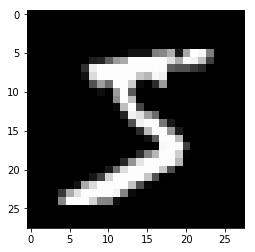

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Conversion de notre vecteur d'une dimension en 2 dimensions
matrix = np.reshape(x_train[0], (28,28))

plt.imshow(matrix, cmap='gray')

#Affiche un 5, tout comme nous avions vu comme premier "label" du jeu de données
plt.show()

Pour être capable d'implémenter le classifieur bayésien naïf dans la section suivante, nous devons transformer les valeurs d'intensité de pixels allant de 0 à 255 en valeurs binaires 0 et 1; vous verrez pourquoi ;). Nous pouvons le faire en utilisant la fonction ```round()```.


In [7]:
for i in range(len(x_train)):
    for j in range(len(x_train[0])):
        if x_train[i][j] != 0 :
            #Nous devons diviser par 255.0 et non 255 pour convertir ces int en float
            x_train[i][j] = round(int(x_train[i][j]) / 255.0)

print(x_train[0])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Nous pouvons utiliser le même code qu'avant pour visualiser le changement :

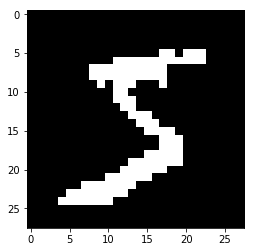

In [8]:
#Conversion de notre vecteur d'une dimension en 2 dimensions
matrix = np.reshape(x_train[0], (28,28))

plt.imshow(matrix, cmap='gray')
plt.show()

### Implémentation d'un classifieur bayésien naïf

Le principe derrière le classifieur bayésien est le suivant : disons que nous avons un nombre de classes $n = |C|$ (10 dans notre cas: $C = \{0, 1, 2, 3, 4, 5, 6, 7, 8, 9\}$) et un vecteur $x$ qui représente notre image. À l'aide du théorème de Bayes, nous pouvons déterminer **la postérieure** $P(c|x)$, soit la probabilité que notre vecteur appartienne à la classe $c$ étant donné sa représentation comme vecteur $x$ à l'aide de l'équation suivante :

$$P(c|x) = \frac{P(x|c) \cdot P(c)}{P(x)}$$

Pour calculer cette probabilité, nous avons besoin de:
- **La vraisemblance** $P(x|c)$, soit la probabilité d'avoir un vecteur $x$ étant donné que le vecteur appartienne à la classe $c$.
- **L'antérieure** $P(c)$, soit la probabilité d'avoir une image de classe $c$ dans notre jeu de données.
- **L'évidence** $P(x)$, soit la probabilité d'avoir un vecteur $x$ dans notre jeu de données.

Une fois que nous pouvons calculer cette probabilité, nous pouvons le faire pour chaque classe à laquelle pourrait appartenir $x$ et choisir la classe qui engendre la probabilité conditionnelle maximale. Nous pouvons exprimer ceci avec la formule suivante :

$$h(x) = \operatorname*{argmax}_{c \ \in \ C}  \ P(c|x)$$

Nous utilisons $h(x)$ ici pour dénoter notre **fonction hypothèse**. 

Commençons par calculer **l'évidence $P(x)$**, soit la probabilité d'avoir un vecteur $x$ représentant une image dans notre jeu de données **(représantant n'importe quel chiffre)**. Nous pouvons utiliser la formule des probabilités totales pour la calculer. Il s'agira de la somme de toutes les probabilités d'obtenir le vecteur $x$ représentant une image de **chacun des chiffres** multipliées par la probabilité d'observer ce chiffre, soit **l'antérieure** $P(c)$:

$$P(x) = P(x|c_1) \cdot P(c_1) + P(x|c_2) \cdot P(c_2) + \dots + P(x|c_n) \cdot P(c_n)$$
$$= \sum_{j=1}^n P(x|c_j)P(c_j)$$

Comme mentionné plus haut, notre scénario implique que $n = 10$. Nous pouvons substituer $P(x)$ dans notre fonction hypothèse. Nous obtenons :

$$h(x) = \operatorname*{argmax}_{c \ \in \ C}  \ P(c|x) = \operatorname*{argmax}_{c \ \in \ C}  \ \frac{P(x|c) \cdot P(c)}{\sum_{j=1}^n P(x|c_j)P(c_j)}$$

Nous observons que **quelle que soit** la classe pour laquelle nous calculons $P(c|x)$ pour un vecteur $x$, le dénominateur reste toujours le même puisqu'il est calculé de manière identique. Il est ensuite important de comprendre que si une valeur $V_1$ est supérieure à $V_2$, et que nous divisons les deux valeurs par une constante **positive** $c$, l'inégalité $\frac{V_1}{c} > \frac{V_2}{c}$ est toujours satisfaite. C'est le cas ici puisque le dénominateur est une probabilité, ce qui implique qu'il ne pourra jamais être négatif. De ce fait, **nous n'avons pas besoin de calculer l'évidence $P(x)$ dans notre fonction hypothèse** puisque cette dernière n'aura aucun impact sur la valeur maximale de $P(x|c) \cdot P(c)$. Notre fonction hypothèse devient donc :

$$h(x) = \operatorname*{argmax}_{c \ \in \ C}  \ P(c|x) = \operatorname*{argmax}_{c \ \in \ C}  \ P(x|c) \cdot P(c)$$

Parfait! Un terme de moins à calculer. Continuons par calculer **L'antérieure** $P(c)$, soit la probabilité d'avoir une image de classe $c$ dans notre jeu de données. Pour calculer cette probabilité pour une classe en particulier, il suffit de compter le nombre de données avec l'étiquette de cette classe et de la diviser par le nombre total de données : 

$$P(c) = \frac{\# données \ de \ classe \ c}{\# total \ de \ données}$$

Puisque nous avons $10$ classes dans notre implémentation, nous devons parcourir ```y_train``` en ajustant 10 compteurs d'instance d'étiquettes, soit un pour chaque classe. Dans la cellule ci-dessous, déclarez une liste ```counts``` et affectez-lui 10 valeurs nulles.

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Nous pouvons maintenant compter le nombre d'instances de chaque étiquette. Parcourez ```y_train``` en affectant à ```counts``` les valeurs appropriées : ```counts[0]``` sera le nombre de zéro dans ```y_train```, ```counts[1]``` le nombre de 1, etc. Imprimez ensuite le résultat.

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Vous devez avoir obtenu ```[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]```. Nous voulons maintenant obtenir une liste ```priors``` qui nous donnera la probabilité d'avoir une image de chaque classe dans notre jeu de données.

Nous obtenons ```[0.09871666666666666, 0.11236666666666667, 0.0993, 0.10218333333333333, 0.09736666666666667, 0.09035, 0.09863333333333334, 0.10441666666666667, 0.09751666666666667, 0.09915]```.

Maintenant que nous avons calculé $P(c)$, soit l'antérieure de chaque classe, il ne nous reste plus qu'à calculer **la vraisemblance** $P(x|c)$. C'est un peu plus compliqué que l'antérieure. Puisque notre vecteur $x$ est en fait $(x_1, x_2, \dots, x_{784})$, nous cherchons à déterminer $P(x_1, x_2, ... x_{784}|c)$. Nous devons utiliser la loi de probabilité à plusieurs variables qui est la suivante: 

$$P(A_1, \dots, A_n) = P(A_1) \times P(A_2|A_1) \times P(A_3|A_1, A_2) \times \dots \times P(A_n|A_1, A_2, \dots, A_{n-1})$$

Nous avons donc :

$$P(x_1, x_2, ... x_{784}|c) = P(x_1|c) \times P(x_2|c, x_1) \times P(x_3|c, x_1, x_2) \times \dots \times P(x_{784}|c, x_1, x_2, x_3, \dots, x_{783})$$

Si nous faisons l'hypothèse **naïve** que ces probabilités sont **indépendentes**, nous avons par définition que chaque terme $P(x_i|c, x_1, x_2, \dots, x_{i-1})$ devient $P(x_i|c)$. Assumer que ces probabilités sont indépendentes revient à prendre pour acquis qu'il n'y a aucune corrélation entre les pixels, ce qui n'est pas le cas. Il existe d'autres versions du classifieur bayésien qui prennent en compte ces corrélations, voir la section **"pour les maniaques"** dans la conclusion. Voyons toutefois quels résultats nous pouvons obtenir avec cette "wild assumption".

Nous avons :

$$P(x_i|c, x_1, x_2, \dots, x_{i-1}) = P(x_i|c)$$

$$\implies P(x_1, x_2, ... x_{784}|c) = P(x_1|c) \times P(x_2|c) \times P(x_3|c) \times \dots \times P(x_{784}|c)$$

Nous devons calculer dix $P(x|c_j)$ différents, soit une vraisemblance pour chaque classe $j, 0 \leq j \leq 9$. Nous voulons déterminer :

$$P(x_{j1}, x_{j2}, ... x_{j \ 784}|c_j) = P(x_{j1}|c_j) \times P(x_{j2}|c_j) \times P(x_{j3}|c_j) \times \dots \times P(x_{j784}|c_j)$$

$$= \prod_{i = 1}^{784} P(x_{ji}|c_j) $$

Comment calculer $P(x_{ji}|c_j)$ ?

**Puisque nous avons arrondi chaque pixel $x_i$ à une valeur binaire**, nous pouvons modéliser $P(x_{ji}|c_j)$ avec une distribution binomiale où le nombre $n$ d'épreuves de Bernoulli est de 1. Une distribution binomiale où $n = 1$ est d'ailleurs appelée une distribution de Bernouilli. Si vous ne connaissez pas les distributions binomiales, je vous recommande fortement de jeter un coup d'oeil puisqu'il s'agit d'un sujet important.

Définissons la probabilité qu'un pixel $i$ de classe $j$ soit un $1$ comme suit :

$$P(x_{ji} = 1) = p_{ji}$$

La probabilité qu'il soit un $0$ est donc le complément de $p_{ji}$. Nous avons :

$$P(x_{ji} = 0) = (1 - p_{ji})$$

Par la distribution binomiale, nous avons :

$$P(x_{ji}|c_j) = p_{ji}^{x_i}(1 - p_{ji})^{1-x_i}$$

Maintenant que nous savons comment calculer la vraisemblance, il ne nous reste plus qu'à calculer $p_{ji}$ pour toutes les $j$ classes et $i$ pixels. C'est un calcul qui est assez simple :

$$p_{ji} = \frac{\# pixels \ i \ de \ valeur \ 1 \ pour \ les \ données \ de \ classe \ j}{\# total \ de \ données \ de \ classe \ j}$$

**Il y a cependant un problème avec la formule précédente, soit le fait que $p_{ji}$ peut avoir la valeur de zéro.** Ceci arriverait dans le cas où nous observerions **jamais** une valeur de 1 pour un pixel $i$ parmis toutes les images d'une classe $j$ dans notre "test set". *Pourquoi est-ce un problème ?*

Rappelons-nous que nous venons de démontrer que :

$$P(x|c_j) = \prod_{i = 1}^{784} P(x_{ji}|c_j) = \prod_{i = 1}^{784} p_{ji}^{x_i}(1 - p_{ji})^{1 - x_i}$$

Si même **une seule** des valeurs $p_{ij}$ est nulle, **notre produit entier sera nullifié**. Supposons que nous avons un pixel $k$ qui est toujours noir dans les images de notre "training set" (un pixel dans un coin, par exemple). Nous aurons :

$$p_{jk} = 0 \implies \prod_{i = 1}^{784} p_{ji}^{x_i}(1 - p_{ji})^{1 - x_i} = 0$$

Ceci malgré les valeurs de $p_{j1}, p_{j2}, \dots, p_{j \ k-1}, p_{j \ k+1}, \dots, p_{j \ 784}$ qui peuvent être de très bonnes probabilités. Pour remédier à ce problème, nous utilisons le **"Laplace smoothing"**. Nous ajustons la formule de la manière suivante : 

$$p_{ji} = \frac{\# (\ pixels \ i \ de \ valeur \ 1 \ pour \ les \ données \ de \ classe \ j \ )\ + 1}{\# (\ total \ de \ données \ de \ classe \ j \ ) \ + 2}$$

Ceci fait en sorte que $p_{ji}$ sera **strictement** supérieur à 0 et inférieur à 1. Nous additonnons 2 au dénominateur puisque nous travaillons avec une **distribution binomiale**. Cette technique est aussi connue sous le nom **d'additive smoothing**. Le "laplace smoothing" est d'ailleurs uitilsé dans la modélisation "sac de mots" en traitement automatique du language naturel. Pour plus d'information, voir :

https://en.wikipedia.org/wiki/Additive_smoothing

https://www.youtube.com/watch?v=k_TiEHh3RI0

Commençons par calculer $p_{ji}$ :

Dans la cellule suivante, initialisez une liste ```sum_pixel_values``` qui sera une matrice de 2 dimensions (liste de listes) contenant la somme de toutes les valeurs des pixels $x_{ji}$ dans ```x_train```. Plus précisément, ```sum_pixel_values``` aura une dimension de $10 \times 784$. Calculez ensuite ces valeurs. **Rappel :** $j$ est la $j^{ème}$ classe ($0 \leq j \leq 9$) et $i$ est le $i^{ème}$ pixel ($0 \leq j < 784$). 

**Attention!** Nous utilisions avant l'index $j$ allant de $1$ à $784$ dans l'explication. Il est plus simple de commencer à zéro dans l'implémentation pour une question de gestion d'indices.

Nous pouvons maintenant calculer $p_{ji}$. Initialisez une nouvelle liste ```pixel_probability``` de la même dimension que ```sum_pixel_values``` et calculez chaque $p_{ji}$ en utilisant le "laplace smoothing" tel qu'expliqué plus haut. *Indice* : nous avons déjà calculé les deux variables dans cette équation.

Il serait maintenant intéressant de visualiser ce que nous venons de calculer. À l'aide du code utilisé plus haut pour l'affichage de vecteurs de ```x_train```, affichez nos probabilités de pixels pour chaque classe.

En résumé, notre **fonction hypothèse** $h(x)$ nécessitait deux ingrédients : 

$$h(x) = \operatorname*{argmax}_{c \ \in \ C}  \ P(x|c) \cdot P(c)$$

$P(c)$ est **l'antérieure** que nous avons premièrement calculée pour chaque classe. $P(x|c)$ est **la vraisemblance** où :

$$P(x|c_j) = \prod_{i = 1}^{784} p_{ji}^{x_i}(1 - p_{ji})^{1-x_i}$$

Nous avons ensuite généré la matrice ```pixel_probability``` qui contient chacune des valeurs $p_{ji}$.

En plaçant cette dernière dans la première équation, nous avons : 

$$h(x) = \operatorname*{argmax}_{c \ \in \ C}  \ P(c_j) \cdot \prod_{i = 1}^{784} p_{ji}^{x_i}(1 - p_{ji})^{1-x_i}$$

Il ne nous reste qu'un ajustement à faire à $h(x)$. Un produit d'un nombre élevé de petites probabilités est problématique. Il se pourrait que ces dernières soient un résultat si petit qu'un ordinateur aie de la difficulté à les représenter sur son processeur, un problème appelé le soupassement arithmétique (underflow). Pour y remédier, nous pouvons calculer le logarithme de ces valeurs. Similairement au fait que **nous n'avions pas à calculer l'évidence** plus tôt dans notre fonction objectif puisque $V_1 > V_2 \implies \frac{V_1}{c} > \frac{V_2}{c}$ pour une constante $c$ positive, prendre le logarithme de $P(c_j) \cdot \prod_{i = 1}^{784} p_{ji}^{x_i}(1 - p_{ji})^{x_i}$ ne change pas sa valeur maximale car le logarithme est une **fonction monotone croissante**. Notez que le sens de variation d'une fonction monotone est constant. Nous avons donc :

$$h(x) = \operatorname*{argmax}_{c \ \in \ C}  \ \log(P(c_j) \cdot \prod_{i = 1}^{784} p_{ji}^{x_i}(1 - p_{ji})^{1-x_i}) = \operatorname*{argmax}_{c \ \in \ C}  \ \log(P(c_j)) + \log(\prod_{i = 1}^{784} p_{ji}^{x_i}(1 - p_{ji})^{1-x_i})$$

$$= \operatorname*{argmax}_{c \ \in \ C}  \ \log(P(c_j)) + \sum_{i = 1}^{784} \log(p_{ji}^{x_i}(1 - p_{ji})^{1-x_i})$$

$$= \operatorname*{argmax}_{c \ \in \ C}  \ \log(P(c_j)) + \sum_{i = 1}^{784} (x_i \cdot \log(p_{ji})+(1-x_i)\cdot \log(1 - p_{ji}))$$

Nous avons la forme finale de notre fonction hypothèse $h(x)$. Déclarez dans la cellule suivante une fonction ```hypothesis()``` qui prend comme argument un vecteur $x$ et retourne $h(x)$.

Nous pouvons maintenant classer notre "test set". Importez le fichier *mnist_test.csv* et créez les listes ```x_test```et ```y_test``` tel que nous l'avions fait avant pour le "training set".

Nous pouvons **finalement** classifier notre training set. Il suffit d'itérer notre fonction hypothèse sur les 10 000 vecteurs composant ```x_test``` en comparant le résultat avec la valeur de ```y_test``` correspondante. Il est utile d'accumuler l'index des erreurs dans une liste nommée ```misclassifications```. Ceci dit, il faudra faire preuve de **patience**.

Calculez ensuite notre **taux d'erreur**, soit le pourcentage d'erreurs obtenues en classifiant notre "training set".

Il est intéressant de voir **quelles images** notre classifieur n'a pas classifié correctement. Visualisez un des échecs $x$ et comparez-le à $h(x)$. Est-ce une erreur compréhensible?

# Conclusion

Nous venons de compléter cette implémentation du classifieur naïf bayésien. Quelques questions pertinentes se posent par rapport à cet exercice :

1. Si nous n'avions pas arrondi chaque pixel à une valeur binaire, quelle **distribution** aurions-nous utilisé pour modéliser $P(x_{ji} = k), \ 0 \leq k \leq 255$ ? Quel **problème** aurions-nous eu si nous avions décidé d'inclure ces probabilités dans notre modèle?

2. Le **"Laplace smoothing"** était-il vraiment nécessaire? Qu'arriverait-il si nous n'avions pas pris en compte ce détail? Est-ce que notre $h(x)$ est toujours valide? Aussi, quel taux d'erreur indique un modèle qui ne fonctionne pas? Est-ce 100%?

3. Tel que mentionné plus tôt, calculer le $\log(h(x))$ est équivalent à calculer $h(x)$ puisque $\log(x)$ est une fonction **monotone croissante**. Pourrions-nous utiliser une fonction **monotone décroissante** $f(x)$ pour calculer $f(h(x))$ et obtenir le même résultat ou bien faudrait-il faire une modification à notre $h(x)$?

### Pour les maniaques

Ce modèle utilise l'hypothèse **naïve** qu'il n'existe aucune corrélation entre les pixels de nos images. Il existe une variante gaussienne du classifieur bayésien qui en prend compte. La prochaine étape de cet exercise serait d'en faire l'implémentation. Un mot d'encouragement : elle réduit le taux d'erreur à moins de 5%. Voir les pages 8 à 14 : http://www-inst.eecs.berkeley.edu/~cs70/sp15/notes/n21.pdf

Cheers!

Arnaud